## Car Price Prediction







In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#import linear regression
from sklearn.linear_model import LinearRegression

In [489]:
df=pd.read_csv('Cardetails.csv')

#Data Preprocessiong

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [490]:
#Describes descriptive statistics
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [491]:
#Checks for num value in DataFrame
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [492]:
#Shape of dataframe in row x column
df.shape

(8128, 13)

In [493]:
#Mileage,Engine,max_power Consist of string values and integer value
#Converting this value to int value by removing string

df['mileage']=df['mileage'].str.split(' ').str[0]
df['engine']=df['engine'].str.split(' ').str[0]
df['max_power']=df['max_power'].str.split(' ').str[0]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [494]:
#torque donot hold significant meaning because its range are different
df=df.drop(columns=['torque','seats'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2


In [495]:
#Converting string value to float
df['mileage']=df['mileage'].astype(float)
df['engine']=df['engine'].astype(float)

In [496]:
# Handling missing values
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())

df['max_power']=df['max_power'].fillna(df['max_power'].mode()[0])
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')



In [497]:
#Checks for null value
df.dropna(inplace=True)
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64

In [498]:
print(df.duplicated().sum())

1202


In [499]:
#removing duplicates value
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [500]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00


In [501]:

#Label Encoding for categorical datas
print(df['transmission'].unique())


['Manual' 'Automatic']


In [502]:
df['name']=df['name'].str.split(' ').str[0]
df['name'].unique()



array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

## Data Visualization

<Axes: xlabel='fuel'>

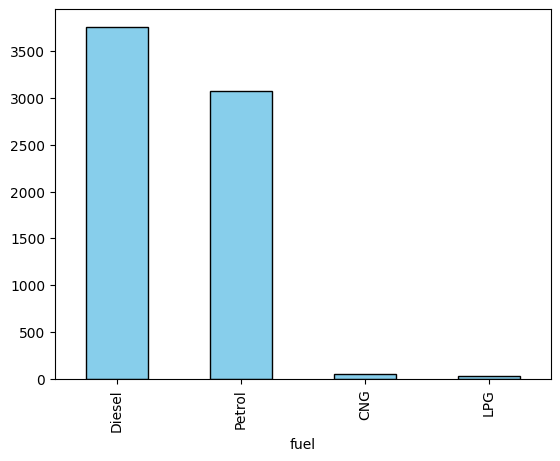

In [503]:
df['fuel'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

1-Diesel- Most used fuel
3-Petrol- Second most used fuel

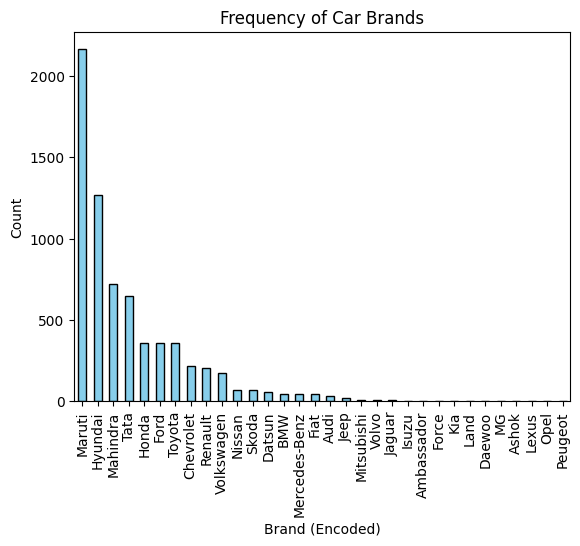

In [504]:
df['name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Car Brands')
plt.xlabel('Brand (Encoded)')
plt.ylabel('Count')
plt.show()

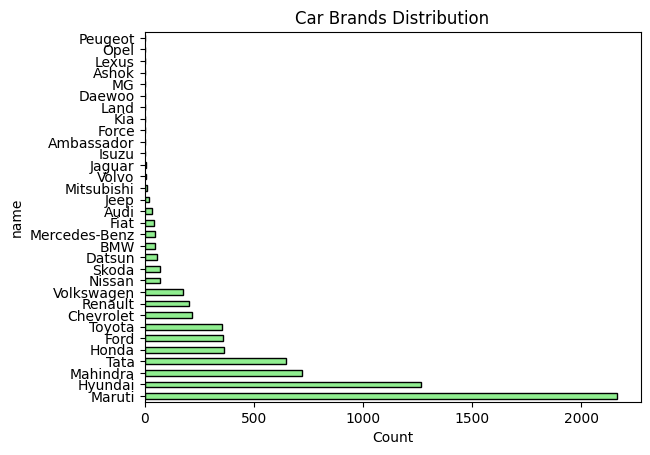

In [505]:
df['name'].value_counts().plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Car Brands Distribution')
plt.xlabel('Count')
plt.show()

Count of maruti car is comparatively higher


<Axes: xlabel='year'>

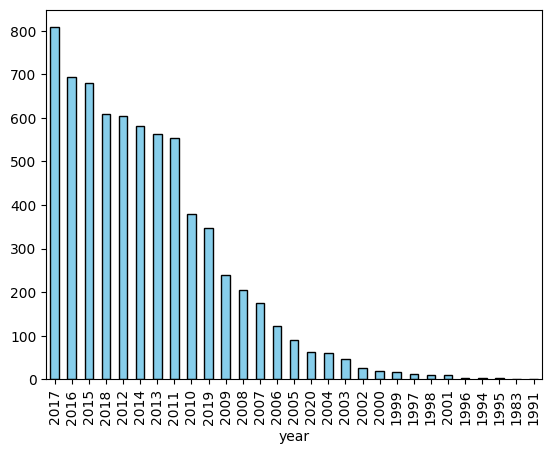

In [506]:
df['year'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

2017 is the year with more no of car count

<class 'pandas.core.frame.DataFrame'>
Index: 6925 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6925 non-null   object 
 1   year           6925 non-null   int64  
 2   selling_price  6925 non-null   int64  
 3   km_driven      6925 non-null   int64  
 4   fuel           6925 non-null   object 
 5   seller_type    6925 non-null   object 
 6   transmission   6925 non-null   object 
 7   owner          6925 non-null   object 
 8   mileage        6925 non-null   float64
 9   engine         6925 non-null   float64
 10  max_power      6925 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 649.2+ KB


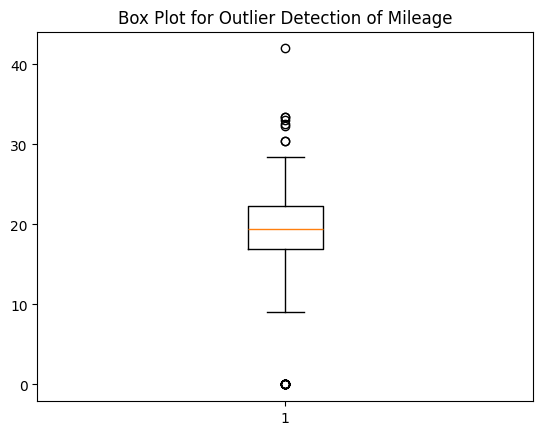

In [507]:


#convert max power to float
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df.info()

# detect outlier in dataset

plt.boxplot(df['mileage'])
plt.title("Box Plot for Outlier Detection of Mileage")
plt.show()

In [508]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['mileage'] < lower_bound) | (df['mileage'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['mileage'].count())

#handle outlier
df = df[(df['mileage'] > lower_bound) & (df['mileage'] < upper_bound)]

Anomalies using IQR:
 name
Hyundai          7
Land             1
Mahindra         2
Maruti           7
Mercedes-Benz    2
Tata             1
Volkswagen       2
Volvo            1
Name: mileage, dtype: int64


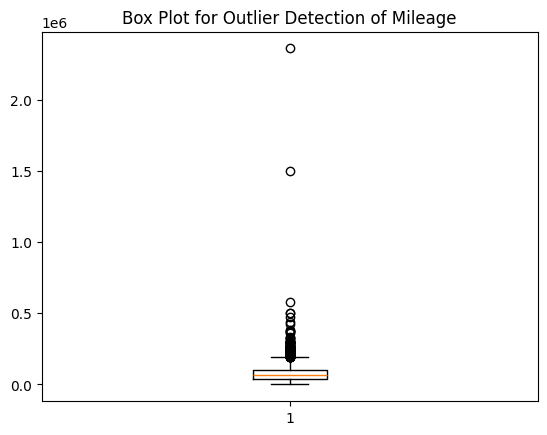

Anomalies using IQR:
 name
Ashok          1
Audi           1
Chevrolet      9
Fiat           1
Ford           6
Honda          3
Hyundai       14
Mahindra      29
Maruti        18
Mitsubishi     2
Nissan         1
Renault        3
Skoda          4
Tata          17
Toyota        55
Volkswagen     3
Name: km_driven, dtype: int64


In [509]:
plt.boxplot(df['km_driven'])
plt.title("Box Plot for Outlier Detection of Mileage")
plt.show()


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['km_driven'].count())

#handle outlier
df = df[(df['km_driven'] > lower_bound) & (df['km_driven'] < upper_bound)]

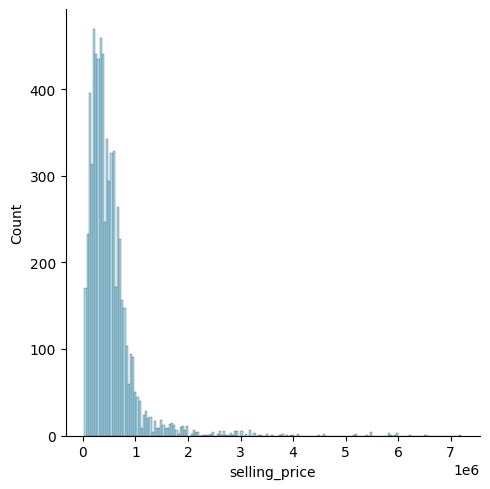

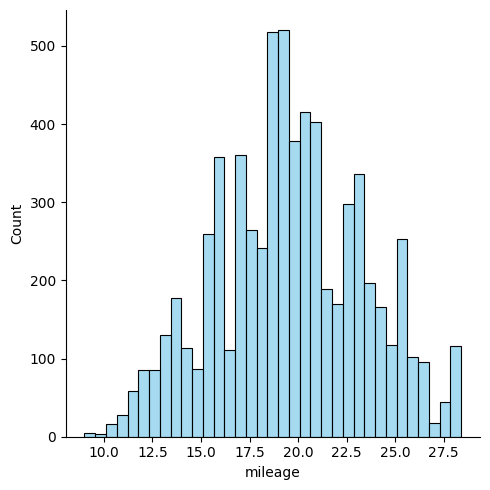

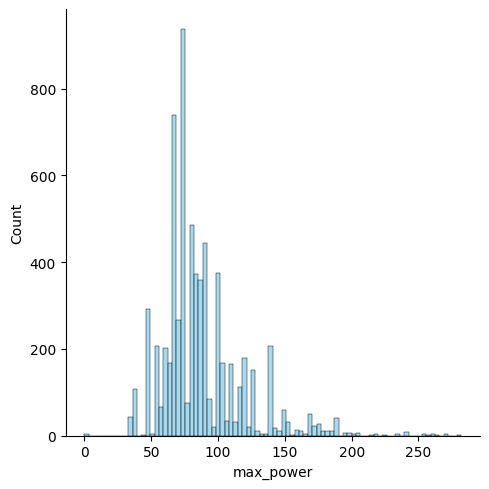

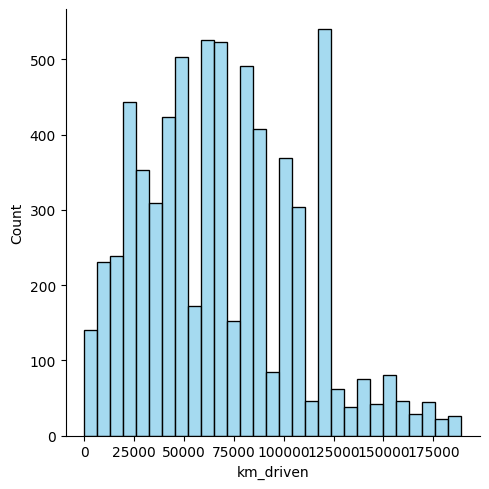

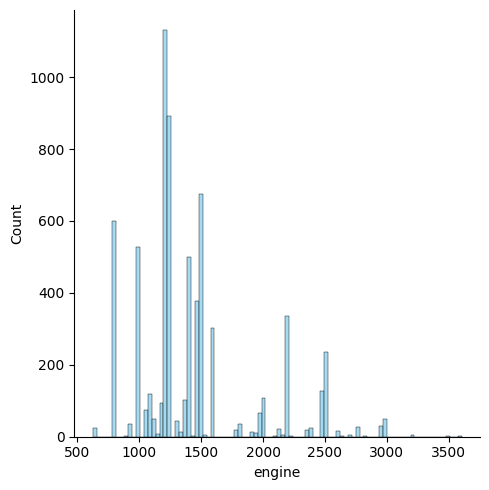

In [510]:
sns.displot(df['selling_price'], color='skyblue')
sns.displot(df['mileage'], color='skyblue')
sns.displot(df['max_power'], color='skyblue')
sns.displot(df['km_driven'], color='skyblue')
sns.displot(df['engine'], color='skyblue')

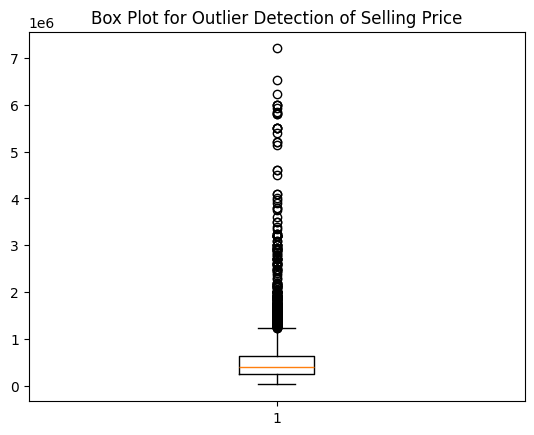

Anomalies using IQR:
 name
Audi             28
BMW              32
Chevrolet         1
Ford              7
Honda            10
Hyundai          10
Isuzu             3
Jaguar            8
Jeep             22
Kia               2
Land              2
Lexus             1
MG                3
Mahindra         36
Mercedes-Benz    34
Mitsubishi        3
Renault           2
Skoda             5
Tata             18
Toyota           81
Volkswagen        4
Volvo             7
Name: selling_price, dtype: int64


In [511]:
plt.boxplot(df['selling_price'])
plt.title("Box Plot for Outlier Detection of Selling Price")
plt.show()


Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['selling_price'] < lower_bound) | (df['selling_price'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['selling_price'].count())

#handle outlier
df = df[(df['selling_price'] > lower_bound) & (df['selling_price'] < upper_bound)]

Anomalies using IQR:
 name
Ambassador         3
Audi               3
BMW               14
Chevrolet         45
Force              4
Ford              10
Honda             13
Hyundai           11
Isuzu              1
Mahindra         466
Mercedes-Benz      7
Mitsubishi         6
Nissan             1
Renault            2
Skoda              4
Tata             124
Toyota           101
Volkswagen         8
Volvo              1
Name: mileage, dtype: int64


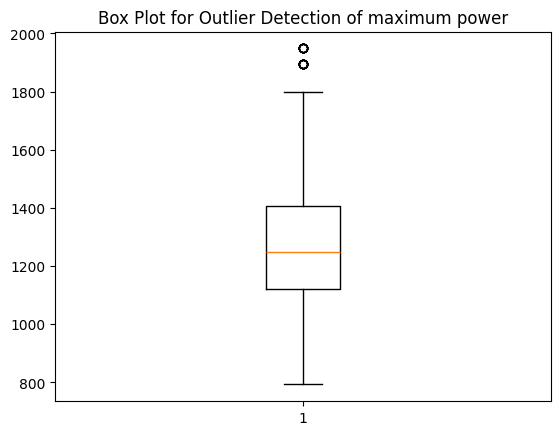

In [512]:


Q1 = df['engine'].quantile(0.25)
Q3 = df['engine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['engine'] < lower_bound) | (df['engine'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['mileage'].count())

#handle outlier
df = df[(df['engine'] > lower_bound) & (df['engine'] < upper_bound)]

plt.boxplot(df['engine'])
plt.title("Box Plot for Outlier Detection of maximum power")
plt.show()


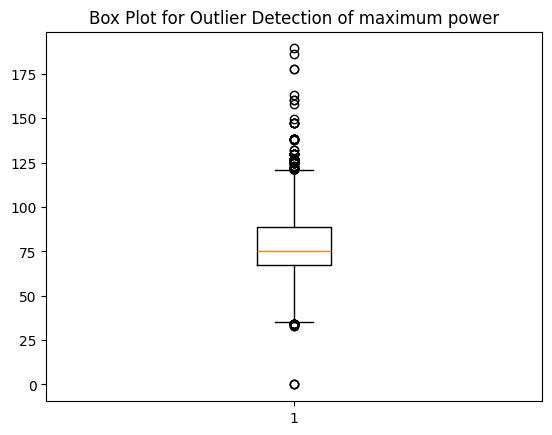

Anomalies using IQR:
 name
Audi               1
Ford               9
Honda             11
Hyundai          178
Maruti            24
Mercedes-Benz      3
Skoda              3
Tata               1
Toyota            16
Volkswagen         3
Name: max_power, dtype: int64


In [513]:
plt.boxplot(df['max_power'])
plt.title("Box Plot for Outlier Detection of maximum power")
plt.show()

Q1 = df['max_power'].quantile(0.25)
Q3 = df['max_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['max_power'] < lower_bound) | (df['max_power'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['max_power'].count())

#handle outlier
df = df[(df['max_power'] > lower_bound) & (df['max_power'] < upper_bound)]



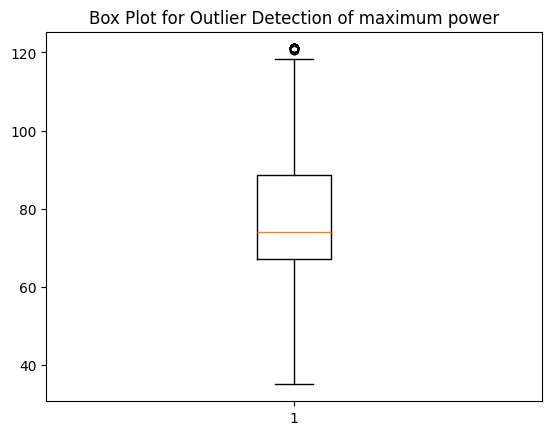

In [514]:
plt.boxplot(df['max_power'])
plt.title("Box Plot for Outlier Detection of maximum power")
plt.show()

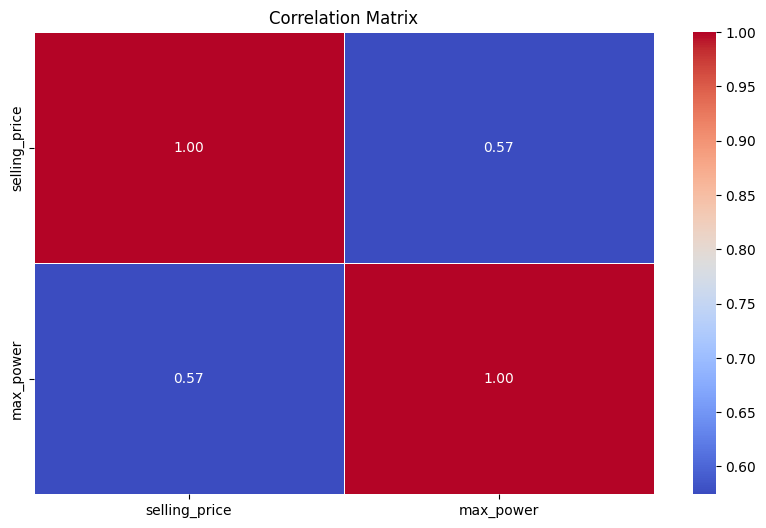

In [515]:
#correlation
correlation = df[['selling_price','max_power']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5327 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5327 non-null   object 
 1   year           5327 non-null   int64  
 2   selling_price  5327 non-null   int64  
 3   km_driven      5327 non-null   int64  
 4   fuel           5327 non-null   object 
 5   seller_type    5327 non-null   object 
 6   transmission   5327 non-null   object 
 7   owner          5327 non-null   object 
 8   mileage        5327 non-null   float64
 9   engine         5327 non-null   float64
 10  max_power      5327 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 499.4+ KB


In [517]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20


## Model training

In [521]:
#delete ['Ashok', 'Isuzu'] from name column
df = df[~df['name'].isin(['Ashok', 'Isuzu','Mercedes-Benz','Mitsubishi','Ambassador','Force',"Kia",'Daewoo','MG','Audi','BMW','Ashok','Opel'])]
df = df[~df['owner'].isin(['Test Drive Car'])]
#splitting data
X = df.drop(columns=['selling_price'])
y = df['selling_price']

print(X.isnull().sum())
print(y.isnull().sum())

df.shape



name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
dtype: int64
0


(5320, 11)

In [522]:
numerical = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
categorical = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),  # Scale numerical features
        ('cat', OrdinalEncoder(), categorical)  # Label encode categorical features
    ]
)


pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('Model', LinearRegression())  # Add a model (e.g., LinearRegression)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)




df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64

In [523]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.725441088996966
